<a href="https://colab.research.google.com/github/wisecrack7/Data-Analytics-/blob/main/Data_Analytics_RevoU_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==== IMPORT LIBRARIES ====
import pandas as pd
import matplotlib.pyplot as plt

# ==== MOUNT GOOGLE DRIVE ====
from google.colab import drive
drive.mount('/content/drive')

# ==== LOAD DATA ====
file_path = '/content/drive/MyDrive/RevoU Task Data Analytics/sales_data.csv'
df = pd.read_csv(file_path)

# ==== MENGUBAH ORDERDATE KE DATETIME ====
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# ==== CEK DATA ====
print("Data Overview:")
print(df.head())
print("\nInfo singkat:")
print(df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Overview:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        


Total Sales per Year:
   YEAR_ID       SALES
1     2004  4724162.60
0     2003  3516979.54
2     2005  1791486.71

Tahun dengan total sales tertinggi: 2004 (Total: 4724162.60)


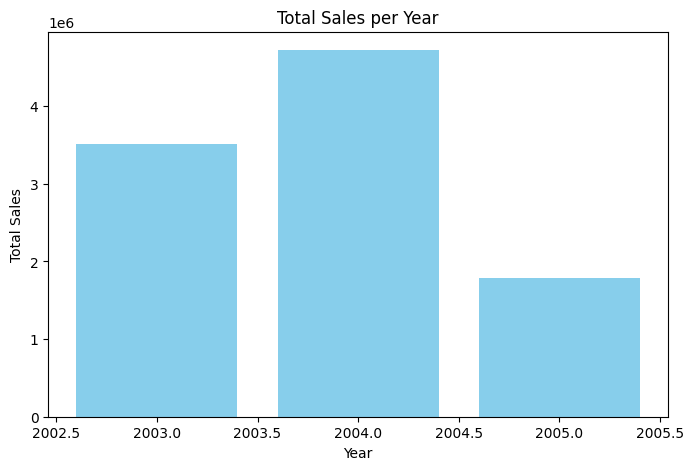

In [ ]:
# TOTAL SALES PER YEAR

yearly_sales = df.groupby('YEAR_ID')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False)

print("\nTotal Sales per Year:")
print(yearly_sales)

# Tahun dengan total sales tertinggi
best_year = yearly_sales.loc[yearly_sales['SALES'].idxmax()]
print(f"\nTahun dengan total sales tertinggi: {int(best_year['YEAR_ID'])} (Total: {best_year['SALES']:.2f})")

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(yearly_sales['YEAR_ID'], yearly_sales['SALES'], color='skyblue')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
#NEGARA DENGAN PENJUALAN CLASSIC CARS TERTINGGI DI 2004

classic_2004 = df[(df['YEAR_ID'] == 2004) & (df['PRODUCTLINE'] == 'Classic Cars')]
country_sales = classic_2004.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False)

print("\nNegara dengan penjualan Classic Cars tertinggi di 2004:")
print(country_sales.head(1))
print("\nRanking semua negara:")
print(country_sales)



Negara dengan penjualan Classic Cars tertinggi di 2004:
   COUNTRY      SALES
18     USA  560448.26

Ranking semua negara:
        COUNTRY      SALES
18          USA  560448.26
14        Spain  209568.26
6        France  184361.25
16  Switzerland  117713.56
7       Germany   92821.85
17           UK   92672.07
9         Italy   85343.27
0     Australia   76287.38
4       Denmark   70383.59
13    Singapore   54800.41
5       Finland   54248.77
15       Sweden   39915.32
8       Ireland   31688.82
10        Japan   28436.47
3        Canada   20594.39
1       Austria   15309.33
11       Norway   13649.07
12  Philippines   10506.22
2       Belgium    3508.80



Product line dengan jumlah penjualan terbanyak (Sep 2003 - Mar 2004):
    PRODUCTLINE  QUANTITYORDERED
0  Classic Cars            11083

Ranking semua product line:
        PRODUCTLINE  QUANTITYORDERED
0      Classic Cars            11083
6      Vintage Cars             6127
5  Trucks and Buses             3231
1       Motorcycles             2959
3             Ships             2478
2            Planes             2221
4            Trains              878


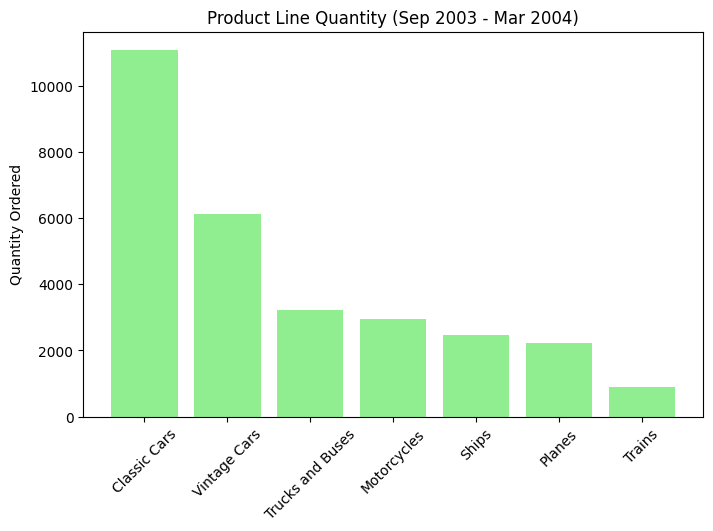

In [ ]:
# PRODUCT LINE TERBANYAK (QUANTITY) SEP 2003 - MAR 2004

mask = (df['ORDERDATE'] >= '2003-09-01') & (df['ORDERDATE'] <= '2004-03-31')
filtered = df[mask]

product_qty = filtered.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index().sort_values(by='QUANTITYORDERED', ascending=False)

print("\nProduct line dengan jumlah penjualan terbanyak (Sep 2003 - Mar 2004):")
print(product_qty.head(1))
print("\nRanking semua product line:")
print(product_qty)

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(product_qty['PRODUCTLINE'], product_qty['QUANTITYORDERED'], color='lightgreen')
plt.title('Product Line Quantity (Sep 2003 - Mar 2004)')
plt.xticks(rotation=45)
plt.ylabel('Quantity Ordered')
plt.show()
